# twissed

* Author: D. Minenna
* Date: January 2024

Tutorial on using the twissed package.
In this notebook, we are presenting the beam function from smilei simulations.

## SMILEI Warning

**Warning:** skypiea use $z$ as the longitudinal axis, therefore, $x$ and $z$ axis are inverted compared to SMILEI

## Import
The import of the package is done by the command:
```python
import twissed
```

In [1]:
# twissed
import twissed

# Select colormaps
cm = twissed.Cmap()


 twissed (v2.1.1, 2023/01/25)



For fbpic or smilei simulations, we can check the presence of files in the defined directory

In [2]:
import os

# Selection of the directory with data
directory = os.getcwd() + '/data/SMILEI'

# Find all timesteps
steps = twissed.Steps()
steps.find_data(directory=directory,source='smilei',verbose=True)

INFO: files ['TrackParticlesDisordered_bckgelectron.h5', 'TrackParticlesDisordered_electronfromion.h5', 'TrackParticles_electronfromion.h5', 'Probes0.h5', 'Probes1.h5'] found.


In [3]:
# List of diagnostics found:
print(steps.diag_list)

# List of timesteps available
for index, timesteps in enumerate(steps.timesteps_all):
    print(f"{steps.diag_list[index]}: {timesteps}")

['TrackParticlesDisordered_bckgelectron.h5', 'TrackParticlesDisordered_electronfromion.h5', 'TrackParticles_electronfromion.h5', 'Probes0.h5', 'Probes1.h5']
TrackParticlesDisordered_bckgelectron.h5: [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000, 100000, 105000, 110000, 115000, 120000]
TrackParticlesDisordered_electronfromion.h5: [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000, 100000, 105000, 110000, 115000, 120000]
TrackParticles_electronfromion.h5: [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000, 100000, 105000, 110000, 115000, 120000]
Probes0.h5: [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 2700

Now we create the **step** object. It will contain all the information about the beam at a given timestep. We can create several step objects per species.

In [4]:
# timestep selection
timestep = -1 #steps.timesteps_all[0][-1]

#Creation of the step class
step = twissed.Step()

# Read data 
step = steps.read_beam(step,timestep,species='electronfromion',Disordered =False) #bckgelectron

# Print attributs obtained
print(step.keys())

INFO: Reading c:\Minenna\Programmation\Twissed_tutorial/data/SMILEI\TrackParticles_electronfromion.h5 at timestep: 120000


['verbose', 'x', 'y', 'z', 'ux', 'uy', 'uz', 'w', 'g', 'Ek', 'vz', 'charge', 'N', 'Ek_avg', 'Ek_med', 'Ek_std', 'Ek_mad', 'Ek_std_perc', 'Ek_mad_perc', 'g_avg', 'g_med', 'g_std', 'g_mad', 'sigma_x', 'sigma_y', 'sigma_z', 'sigma_ux', 'sigma_uy', 'sigma_uz', 'sigma_Ek', 'betaz_avg', 'p', 'p_avg', 'dp', 'dp_avg', 'sigma_dp', 'xp', 'yp', 'sigma_xp', 'sigma_yp', 'x_divergence', 'y_divergence', 'x_avg', 'y_avg', 'z_avg', 'xx_avg', 'yy_avg', 'ux_avg', 'uy_avg', 'uz_avg', 'xp_avg', 'yp_avg', 'xpxp_avg', 'ypyp_avg', 'xxp_avg', 'yyp_avg', 'emit_rms_x', 'emit_rms_y', 'emit_norm_rms_x', 'emit_norm_rms_y', 'beta_x', 'beta_y', 'gamma_x', 'gamma_y', 'alpha_x', 'alpha_y', 'xy_avg', 'xyp_avg', 'yxp_avg', 'xpyp_avg', 'xz_avg', 'xdp_avg', 'zxp_avg', 'xpdp_avg', 'yz_avg', 'ydp_avg', 'zyp_avg', 'ypdp_avg', 'zz_avg', 'zdp_avg', 'dpdp_avg', 'sigma_matrix', 'emit_rms_z', 'emit_norm_rms_z', 'beta_z', 'gamma_z', 'alpha_z', 'emit_norm_rms_4D', 'emit_norm_rms_6D', 'x_dispersion', 'y_dispersion', 'Ek_hist_yaxis', 

These are examples of what you get and what you can do with the step class. The default unit is always the same but you can convert it with the function

In [5]:
print(f"N particle: {step.N}")
print(f"Positions {step.x} [m]")
step.print('emit_norm_rms_y')
step.print('sigma_x')
step.print('charge')
print(f"Convert x in um: {step.convert('x','um')}")

N particle: 759982
Positions [ 1.06599512e-06 -2.07305204e-07  1.48486488e-08 ...  7.55046256e-07
 -1.14883389e-08  1.78593108e-06] [m]
3.1674395120318204 [pi.mm.mrad], Normalized trace emittance 1-rms $\gamma \beta \epsilon_{yy'}$ in y
2.327758616417028e-06 [m], RMS size in x.
239.4372621266616 [pC], Total charge of the beam. For electrons : $Q = (\sum_i w_i e) / 1e-12
Convert x in um: [ 1.06599512 -0.2073052   0.01484865 ...  0.75504626 -0.01148834
  1.78593108]


You can plot directly from the step class. The processing takes into account the weight of each macro-particle.

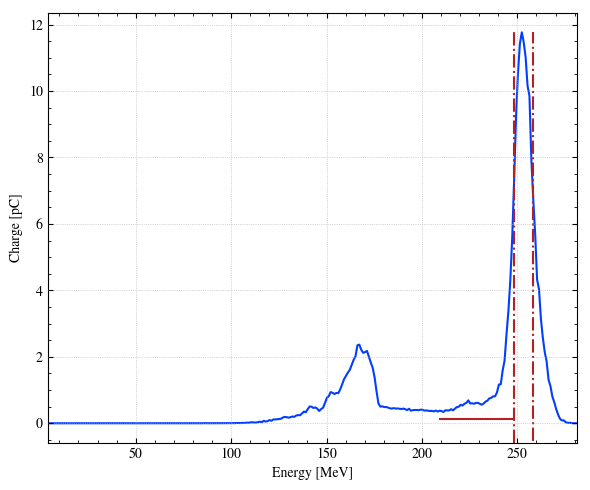

In [6]:
# Simple plot of the x distribution (dQ/dx). Note that x axis is convert in um with xconv. step.sigma_x is the standard deviation (bunch length) in x.
_ = step.hist1D(
    'Ek',
    dx=1,
    plot='plot',
)

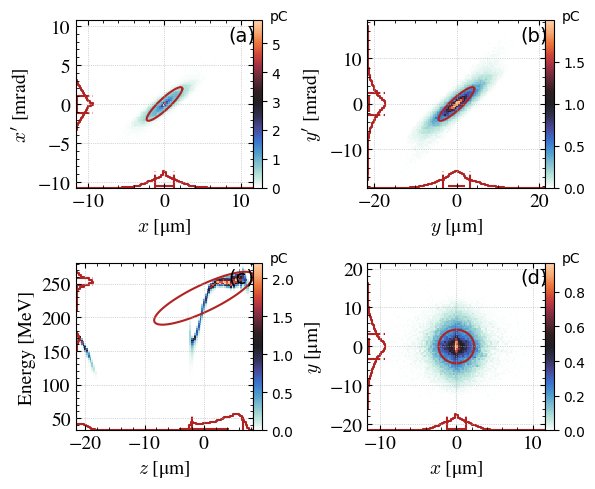

In [7]:
_ = step.plot_beam(
    xrange=[-3*step.sigma_x*1e6,3*step.sigma_x*1e6],
    xprange=[-3*step.sigma_xp*1e3,3*step.sigma_xp*1e3],
    yrange=[-5*step.sigma_y*1e6,5*step.sigma_y*1e6],
    yprange=[-6*step.sigma_yp*1e3,6*step.sigma_yp*1e3],
    zrange=[-10,10],
    energyrange=[-3*step.sigma_Ek,3*step.sigma_Ek],
)

## get_field

In [8]:
# timestep selection
timestep = steps.timesteps_all[3][50] 

# Read data 
step = steps.read_field(step,timestep) # Can chose probe=1 only. 

# Print attributs obtained
print(step.keys())

INFO: Reading c:\Minenna\Programmation\Twissed_tutorial/data/SMILEI\Probes0.h5 at timestep: 50000
INFO: Reading c:\Minenna\Programmation\Twissed_tutorial/data/SMILEI\Probes1.h5 at timestep: 50000
['verbose', 'x', 'y', 'z', 'ux', 'uy', 'uz', 'w', 'g', 'Ek', 'vz', 'charge', 'N', 'Ek_avg', 'Ek_med', 'Ek_std', 'Ek_mad', 'Ek_std_perc', 'Ek_mad_perc', 'g_avg', 'g_med', 'g_std', 'g_mad', 'sigma_x', 'sigma_y', 'sigma_z', 'sigma_ux', 'sigma_uy', 'sigma_uz', 'sigma_Ek', 'betaz_avg', 'p', 'p_avg', 'dp', 'dp_avg', 'sigma_dp', 'xp', 'yp', 'sigma_xp', 'sigma_yp', 'x_divergence', 'y_divergence', 'x_avg', 'y_avg', 'z_avg', 'xx_avg', 'yy_avg', 'ux_avg', 'uy_avg', 'uz_avg', 'xp_avg', 'yp_avg', 'xpxp_avg', 'ypyp_avg', 'xxp_avg', 'yyp_avg', 'emit_rms_x', 'emit_rms_y', 'emit_norm_rms_x', 'emit_norm_rms_y', 'beta_x', 'beta_y', 'gamma_x', 'gamma_y', 'alpha_x', 'alpha_y', 'xy_avg', 'xyp_avg', 'yxp_avg', 'xpyp_avg', 'xz_avg', 'xdp_avg', 'zxp_avg', 'xpdp_avg', 'yz_avg', 'ydp_avg', 'zyp_avg', 'ypdp_avg', 'zz_avg

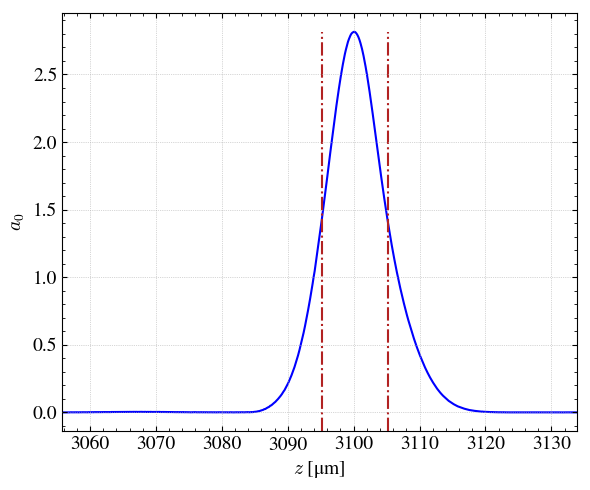

In [9]:
step.plot_field1D(
    'zfield',
    'a01D',
    xconv='um',
    # yconv='GV/m'
)

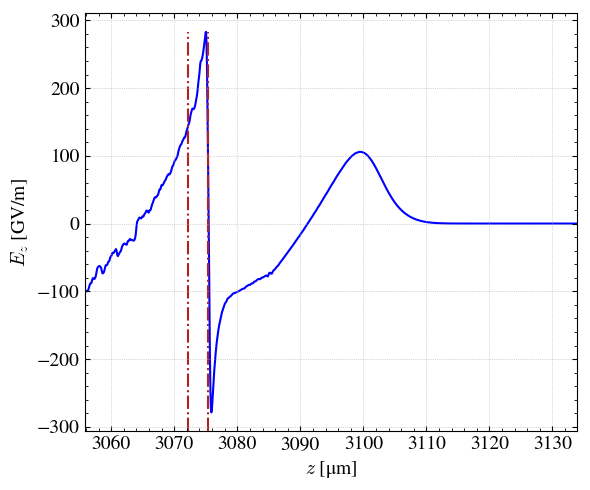

In [10]:
step.plot_field1D(
    'zfield',
    'Ez1D',
    xconv='um',
    yconv='GV/m'
)

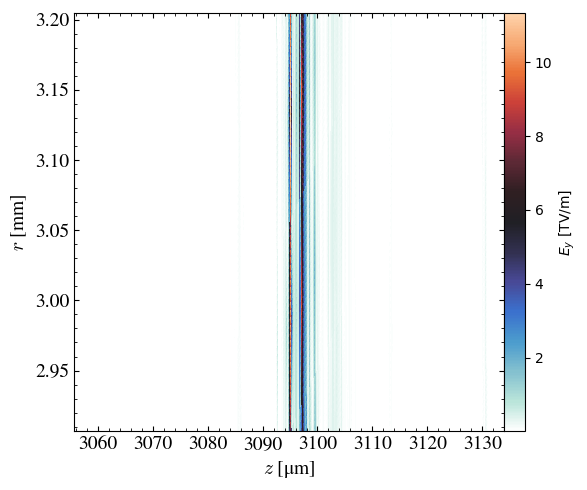

In [11]:
# Simple plot of the density
step.plot_field2D(
    'zfield',
    'rfield',
    'Ey2D_env',
    xconv='um',
    yconv='mm',
    zconv='TV/m',
    # cmap=cm.gist_earth,
)